# Multiple Linear Regression

In [3]:
!pip install pipreqs
#creates a requirements.txt file already 

  Stored in directory: /Users/Nam/Library/Caches/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
Successfully built docopt


## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

<a href="https://www.statsmodels.org/stable/index.html">**statsmodels**</a>: *Provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.*
<br><br>
<a href="https://matplotlib.org/1.4.3/mpl_toolkits/index.html">**mpl_toolkits**</a>: *Toolkits are collections of application-specific functions that extend matplotlib*



In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

## Load and Explore the Dataset

In [3]:
#Load the dataset
df = pd.read_csv("Advertising.csv", index_col=0)

#Display the dataset
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
#Describe the dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Correlation

In [5]:
#Get the correlation of the attributes
corr = df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


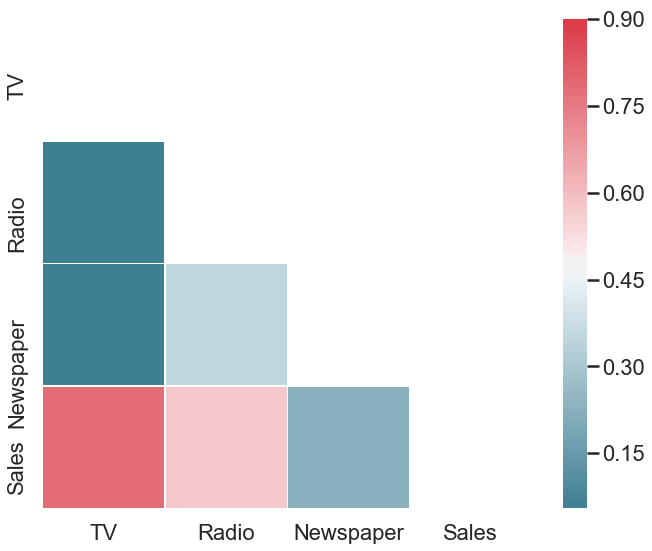

In [6]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

## Build the Model

In [7]:
#Split the dataset to training and testing set

#Lets consider TV and radio to determine the advertising sales
df_train, df_test = train_test_split(df, test_size=0.25, random_state=35)
x_train = df_train[['TV', 'Radio']]
y_train = df_train['Sales']

x_test = df_test[['TV', 'Radio']]
y_test = df_test['Sales']

In [20]:
# Linear Regression

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
#printing the coefficients and which this belongs to
pd.DataFrame(lr.coef_, index=x_train.columns)

,0
TV,0.045753
Radio,0.188831


## Validate the Model

In [10]:
# Predict the values
y_pred = lr.predict(x_test)

In [21]:
from sklearn.externals import joblib

filename = 'model.sav'
joblib.dump(lr,filename)

['model.sav']

In [24]:
#load saved machine learning model
filename = 'model.sav'
saved_model  = joblib.load(filename)
TV = 200
radio = 21
newspaper = 4
#predict sales using variables
predicted_sales = saved_model.predict([[TV, radio]])[0]

In [12]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("r2: %.2f" %r2) 
print("mae: %.2f" %mae) 
print("mse: %.2f" %mse) 
print("rmse: %.2f" %rmse) 

r2: 79.02
mae: 1.31
mse: 3.97
rmse: 1.99


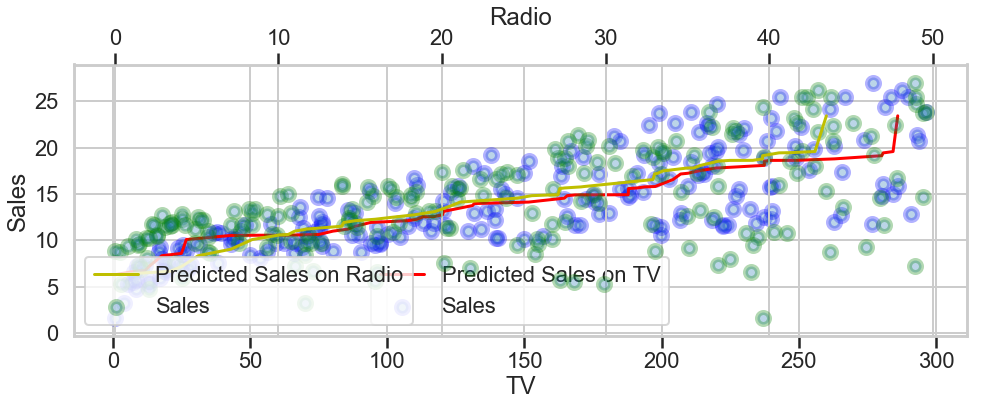

In [13]:
#Visualize the Results

fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

x_test_sort_tv = x_test.TV.sort_values()
x_test_sort_radio = x_test.Radio.sort_values()
predict_sort = pd.Series(y_pred, index = x_test.index).sort_values()

ax1.scatter(df["TV"], df["Sales"],edgecolor="b", alpha=0.3, linewidths=5)
ax2.scatter(df["Radio"], df["Sales"], edgecolor="g", alpha=0.3, linewidths=5)

ax1.plot(x_test_sort_tv, predict_sort, color="r", label = "Predicted Sales on TV",)
ax2.plot(x_test_sort_radio, predict_sort, color="y", label = "Predicted Sales on Radio")


ax1.set_xlabel("TV")
ax1.set_ylabel("Sales")
ax2.set_xlabel("Radio")
ax1.legend(loc='lower center')
ax2.legend(loc='lower left')
plt.show()